In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint



# La Lecture du Dataset 

In [3]:
data=pd.read_csv("Data/heart_statlog_cleveland_hungary_final.csv")

In [4]:

data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
data.shape

(1190, 12)

# Preprocessing du Dataset

In [6]:
data.isnull().sum()


age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

##### Notre DataSet ne contiennent pas les valeurs manquantes

In [7]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


##### traitement des valeurs aberrantes en fonctions des informations dans la documentation

In [8]:
data.loc[data["cholesterol"] <40 , "cholesterol"] = np.nan


In [9]:
# Remplir les valeurs manquantes dans la colonne "cholesterol" avec la moyenne
data["cholesterol"] = data["cholesterol"].fillna(data["cholesterol"].mean())

In [10]:
data.loc[data['oldpeak'] < 0, 'oldpeak'] = data.loc[data['oldpeak'] < 0, 'oldpeak'].abs()

In [11]:
data=data[data["resting bp s"]>=80]

In [12]:
data = data[data['ST slope'] != 0]

In [13]:
data.shape

(1188, 12)

##### traitement des colonnes en fonctions des informations dans la documentation

In [14]:
data.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol            float64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [21]:
# Remplacer les valeurs dans la colonne 'sex'
data.loc[data['sex'] == 0, 'sex'] = 'female'
data.loc[data['sex'] == 1, 'sex'] = 'male'

# Remplacer les valeurs dans la colonne 'chest pain type'
data.loc[data['chest pain type'] == 1, 'chest pain type'] = 'typical angina'
data.loc[data['chest pain type'] == 2, 'chest pain type'] = 'atypical angina'
data.loc[data['chest pain type'] == 3, 'chest pain type'] = 'non-anginal pain'
data.loc[data['chest pain type'] == 4, 'chest pain type'] = 'asymptomatic'

# Remplacer les valeurs dans la colonne 'fasting blood sugar'
data.loc[data['fasting blood sugar'] == 0, 'fasting blood sugar'] = 'fasting blood sugar < 120 mg/dl'
data.loc[data['fasting blood sugar'] == 1, 'fasting blood sugar'] = 'fasting blood sugar > 120 mg/dl'

# Remplacer les valeurs dans la colonne 'resting ecg'
data.loc[data['resting ecg'] == 0, 'resting ecg'] = 'normal'
data.loc[data['resting ecg'] == 1, 'resting ecg'] = 'ST-T wave abnormality'
data.loc[data['resting ecg'] == 2, 'resting ecg'] = 'left ventricular hypertrophy'

# Remplacer les valeurs dans la colonne 'exercise angina'
data.loc[data['exercise angina'] == 0, 'exercise angina'] = 'no'
data.loc[data['exercise angina'] == 1, 'exercise angina'] = 'yes'

# Remplacer les valeurs dans la colonne 'ST slope'
data.loc[data['ST slope'] == 1, 'ST slope'] = 'upsloping'
data.loc[data['ST slope'] == 2, 'ST slope'] = 'flat'
data.loc[data['ST slope'] == 3, 'ST slope'] = 'downsloping'

# Remplacer les valeurs dans la colonne 'target'
data.loc[data['target'] == 0, 'target'] = 'normal'
data.loc[data['target'] == 1, 'target'] = 'heart disease'


In [16]:
data.dtypes

age                      int64
sex                     object
chest pain type         object
resting bp s             int64
cholesterol            float64
fasting blood sugar     object
resting ecg             object
max heart rate           int64
exercise angina         object
oldpeak                float64
ST slope                object
target                  object
dtype: object

##### Division en Valeur numeric et catégorique

In [17]:
numerical_variables=data.select_dtypes(include=['int','float'])

In [18]:
numerical_variables

,age,resting bp s,cholesterol,max heart rate,oldpeak
0,40,140,289.0,172,0.0
1,49,160,180.0,156,1.0
2,37,130,283.0,98,0.0
3,48,138,214.0,108,1.5
4,54,150,195.0,122,0.0
...,...,...,...,...,...
1185,45,110,264.0,132,1.2
1186,68,144,193.0,141,3.4
1187,57,130,131.0,115,1.2
1188,57,130,236.0,174,0.0


In [19]:
categorical_variables=data.select_dtypes(exclude=['int','float'])

In [20]:
categorical_variables

,sex,chest pain type,fasting blood sugar,resting ecg,exercise angina,ST slope,target
0,male,atypical angina,fasting blood sugar < 120 mg/dl,normal,no,upsloping,normal
1,female,non-anginal pain,fasting blood sugar < 120 mg/dl,normal,no,flat,heart disease
2,male,atypical angina,fasting blood sugar < 120 mg/dl,ST-T wave abnormality,no,upsloping,normal
3,female,asymptomatic,fasting blood sugar < 120 mg/dl,normal,yes,flat,heart disease
4,male,non-anginal pain,fasting blood sugar < 120 mg/dl,normal,no,upsloping,normal
...,...,...,...,...,...,...,...
1185,male,typical angina,fasting blood sugar < 120 mg/dl,normal,no,flat,heart disease
1186,male,asymptomatic,fasting blood sugar > 120 mg/dl,normal,no,flat,heart disease
1187,male,asymptomatic,fasting blood sugar < 120 mg/dl,normal,yes,flat,heart disease
1188,female,atypical angina,fasting blood sugar < 120 mg/dl,left ventricular hypertrophy,no,flat,heart disease


#### Statistiques

In [23]:
numerical_variables.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1188.0,53.707071,9.356825,28.0,47.0,54.00000,60.0,77.0
resting bp s,1188.0,132.250000,17.971961,80.0,120.0,130.00000,140.0,200.0
cholesterol,1188.0,245.949531,52.966414,85.0,214.0,245.90668,270.0,603.0
max heart rate,1188.0,139.726431,25.534292,60.0,121.0,140.50000,160.0,202.0
oldpeak,1188.0,0.944613,1.068101,0.0,0.0,0.65000,1.6,6.2


In [24]:
categorical_variables.describe().T

,count,unique,top,freq
sex,1188,2,male,907
chest pain type,1188,4,asymptomatic,625
fasting blood sugar,1188,2,fasting blood sugar < 120 mg/dl,935
resting ecg,1188,3,normal,682
exercise angina,1188,2,no,727
ST slope,1188,3,flat,581
target,1188,2,heart disease,627


##### Visualisation et Analyse 

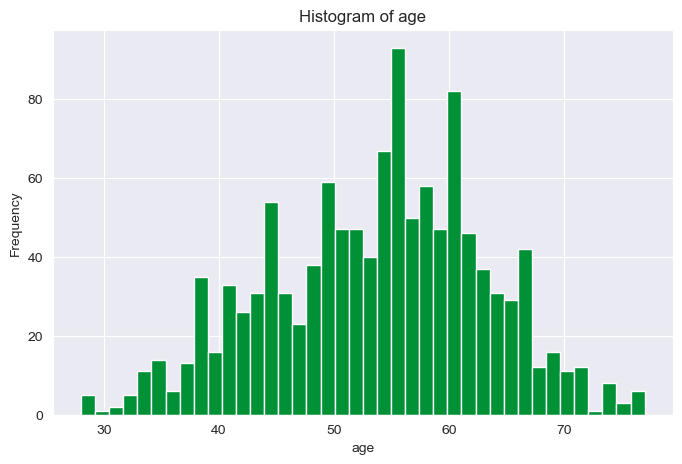

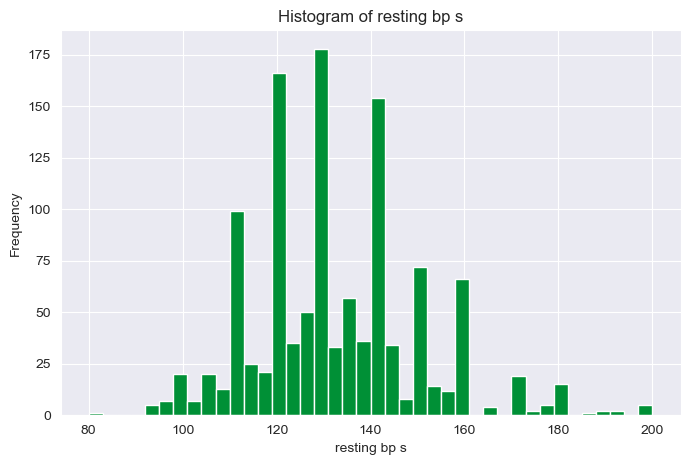

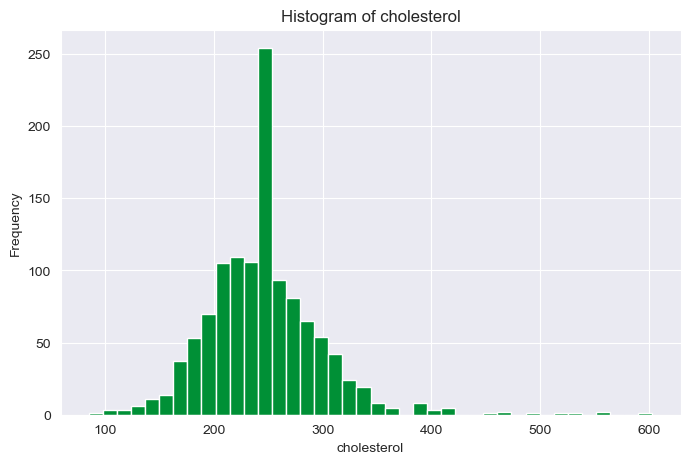

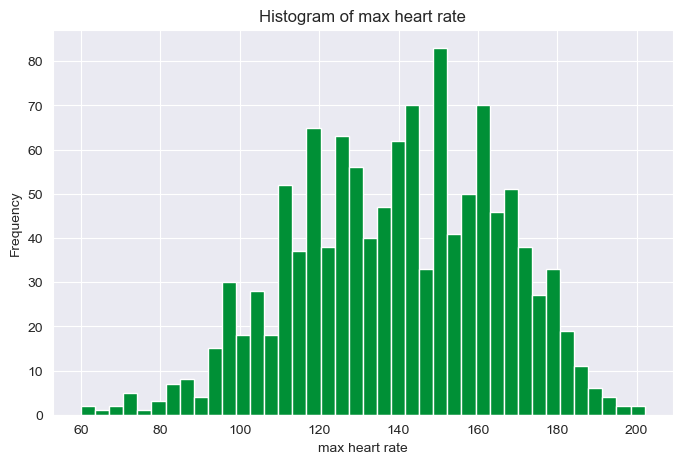

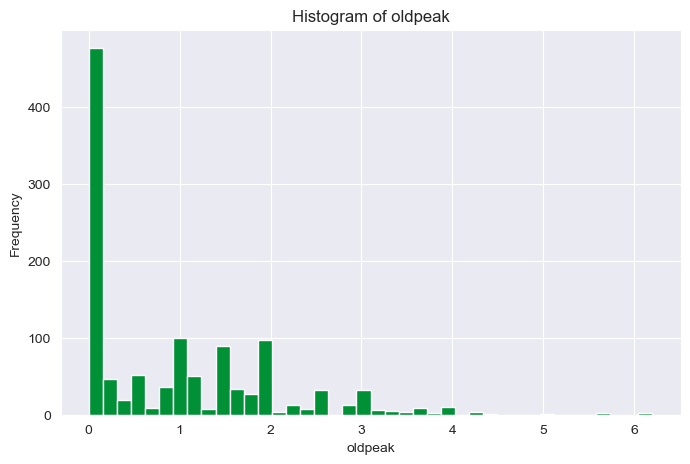

In [25]:
for column in numerical_variables:
    # Histogram
    plt.figure(figsize=(8, 5))
    plt.hist(data[column], bins=40, color='#009036', edgecolor='white')
    plt.title('Histogram of ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    plt.show()

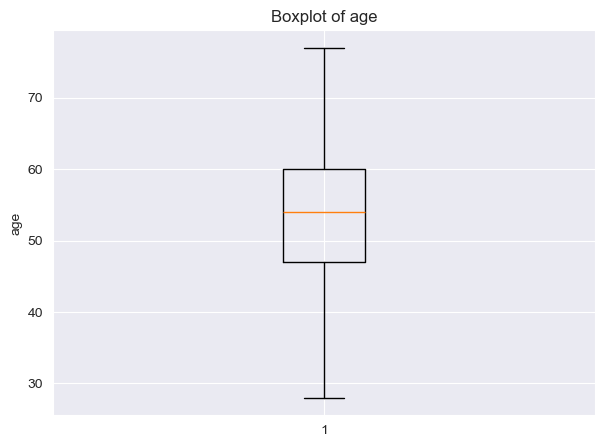

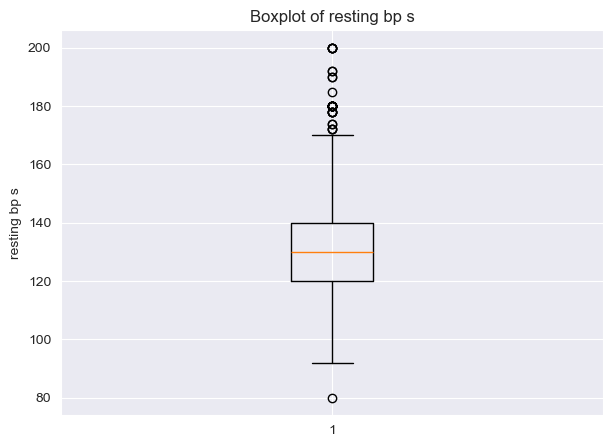

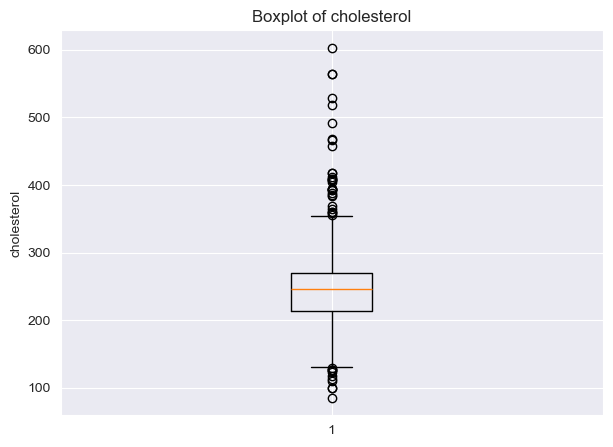

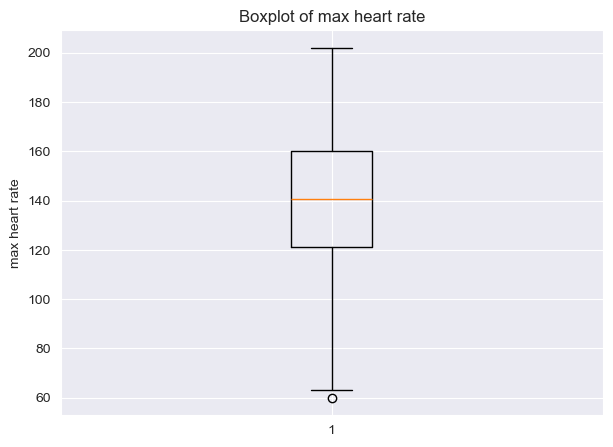

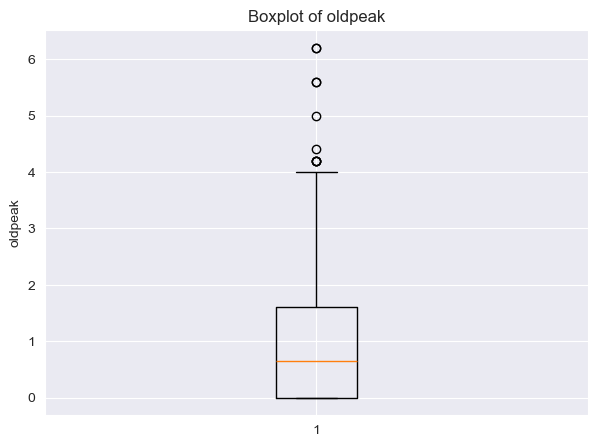

In [26]:
for column in numerical_variables:
    # Boxplot
    plt.figure(figsize=(7, 5))
    plt.boxplot(data[column])
    plt.title('Boxplot of '+ column)
    plt.ylabel(column)
    plt.grid(True)
    plt.show()
    


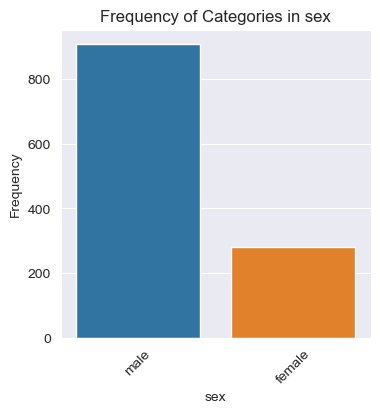

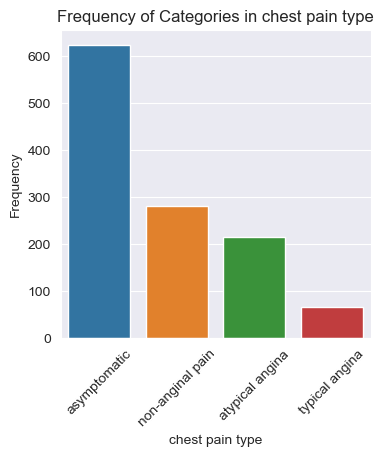

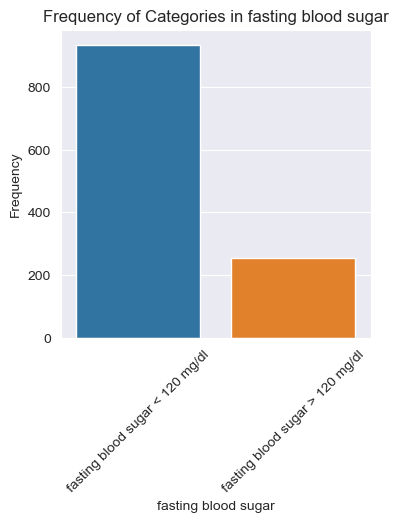

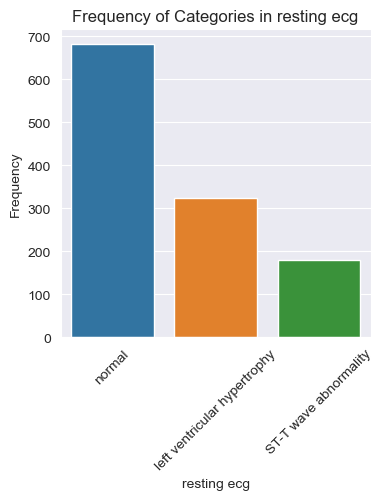

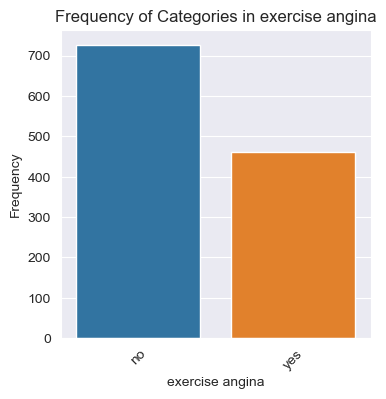

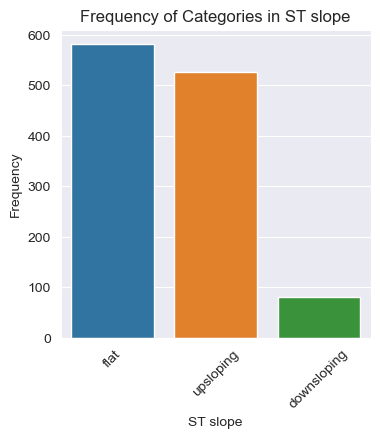

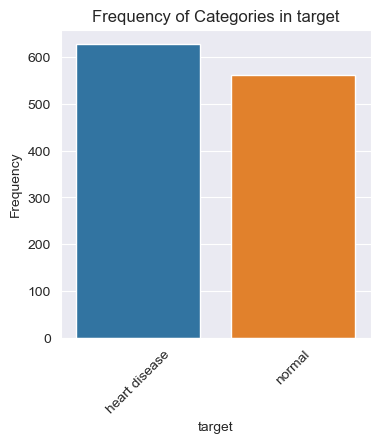

In [27]:
for col in categorical_variables:
    # Count the frequencies of each category
    category_counts = data[col].value_counts()

    # Plot the bar chart
    plt.figure(figsize=(4, 4))
    sns.barplot(x=category_counts.index, y=category_counts.values)
    plt.title('Frequency of Categories in '+ col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.show()

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

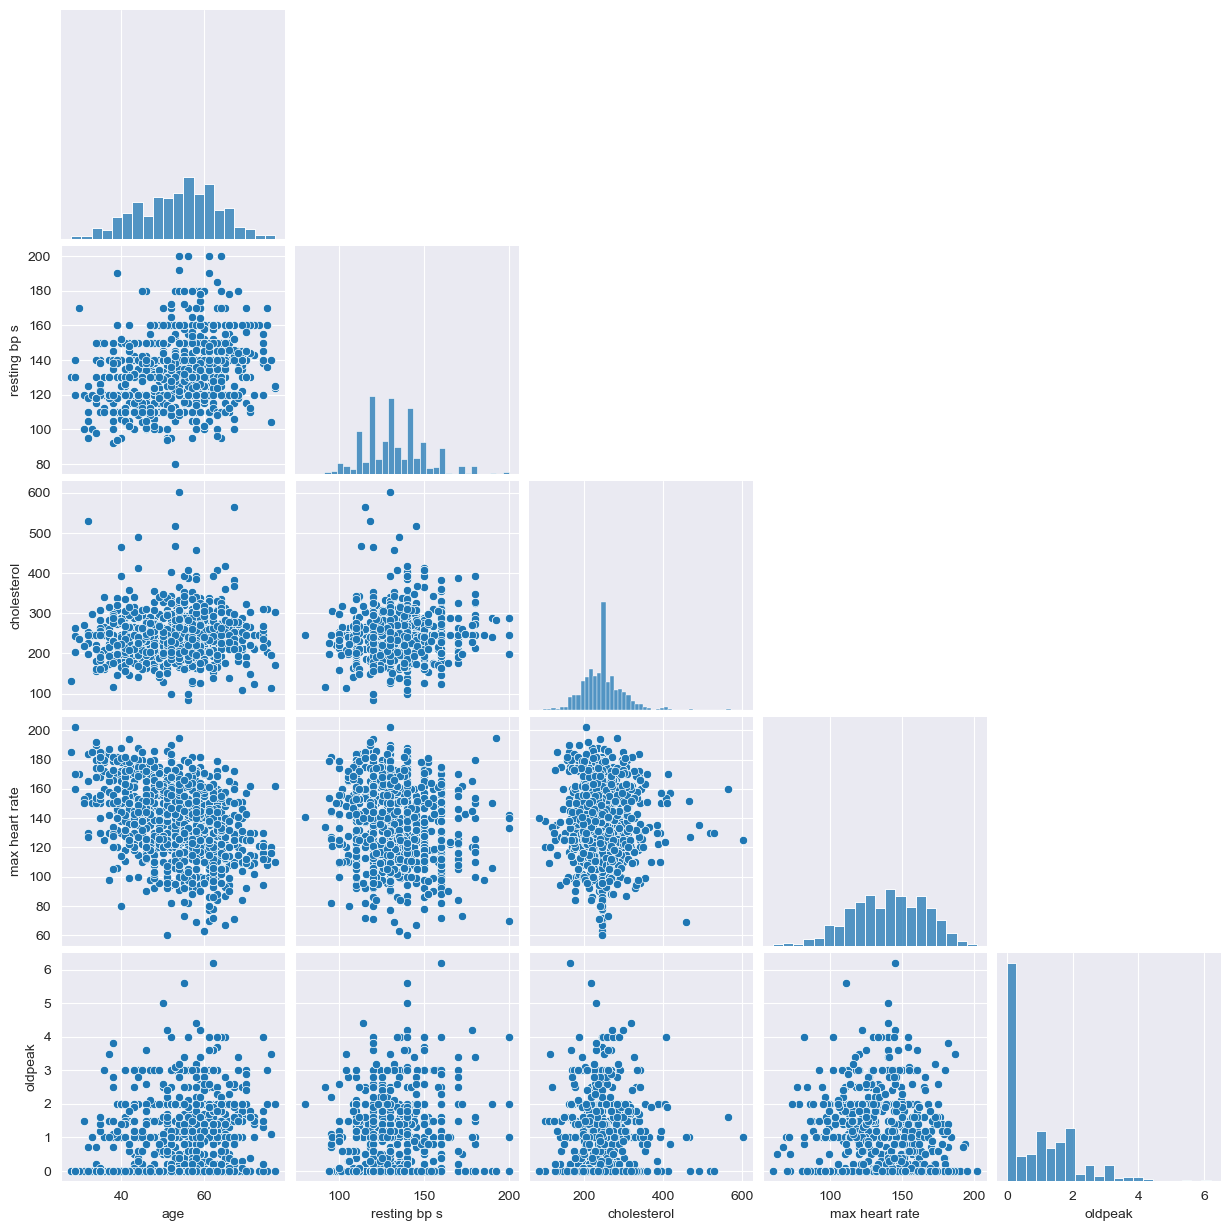

In [28]:
sns.pairplot(numerical_variables,corner=True)

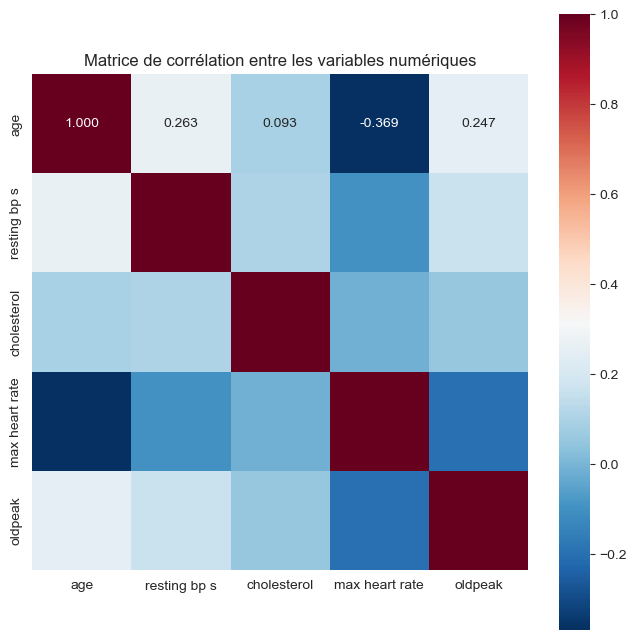

In [29]:
correlation_matrix=numerical_variables.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt=".3f", square=True)
plt.title('Matrice de corrélation entre les variables numériques')
plt.show()

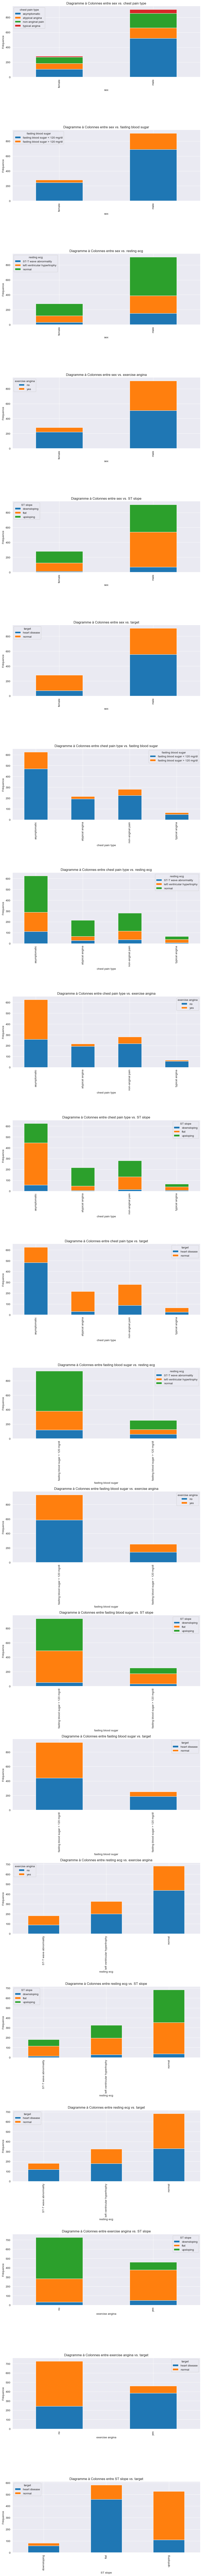

In [30]:
# Liste des paires de variables catégorielles à comparer
pairs = [(categorical_variables.columns[i], categorical_variables.columns[j]) 
         for i in range(len(categorical_variables.columns))
         for j in range(i + 1, len(categorical_variables.columns))]

# Créer un diagramme à colonnes empilées pour chaque paire de variables catégorielles
num_pairs = len(pairs)
fig, axes = plt.subplots(nrows=num_pairs, ncols=1, figsize=(10, 6*num_pairs))

# Si il y a un seul graphique, axes ne sera pas une liste mais un seul objet Axes
if num_pairs == 1:
    axes = [axes]

for i, (var1, var2) in enumerate(pairs):
    # Créer un tableau croisé des deux variables catégorielles
    ct = pd.crosstab(categorical_variables[var1], categorical_variables[var2])
    
    # Plotter le diagramme à colonnes empilées (stacked bar chart)
    ct.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'Diagramme à Colonnes entre {var1} vs. {var2}')
    axes[i].set_xlabel(var1)
    axes[i].set_ylabel('Fréquence')

# Afficher tous les graphiques à la fin
plt.tight_layout()
plt.show()


C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.8% of the points cannot be placed; you may want to decrease

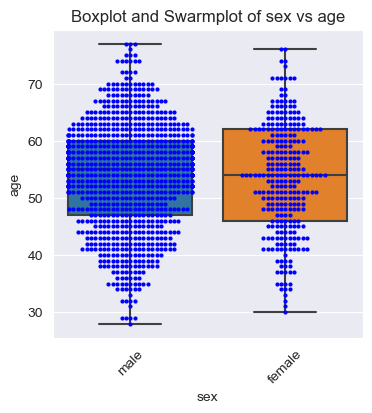

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 39.9% of the points cannot be placed; you may want to decrease

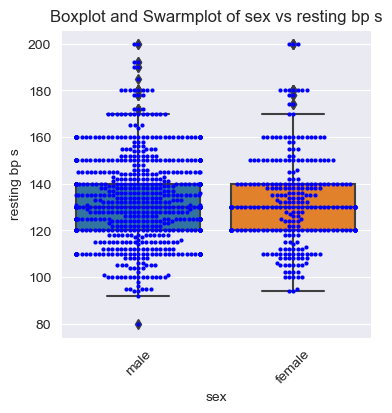

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 36.7% of the points cannot be placed; you may want to decrease

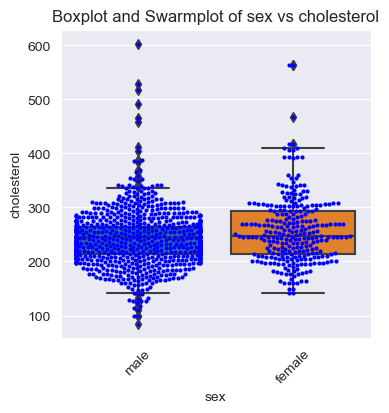

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.6% of the points cannot be placed; you may want to decrease 

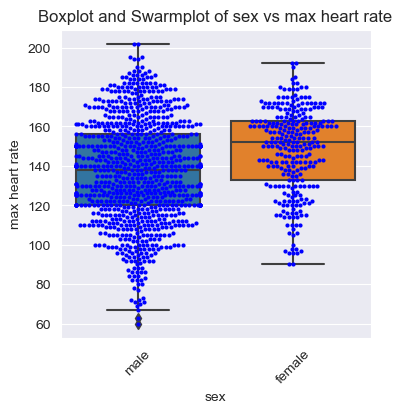

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 45.3% of the points cannot be placed; you may want to decrease

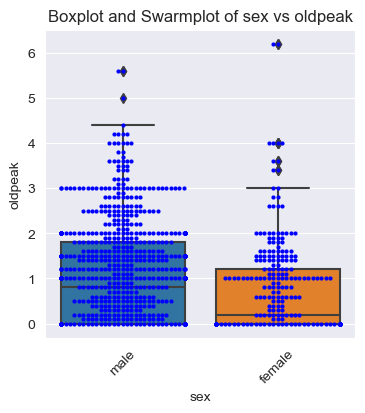

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 29.1% of the points cannot be placed; you may want to decrease

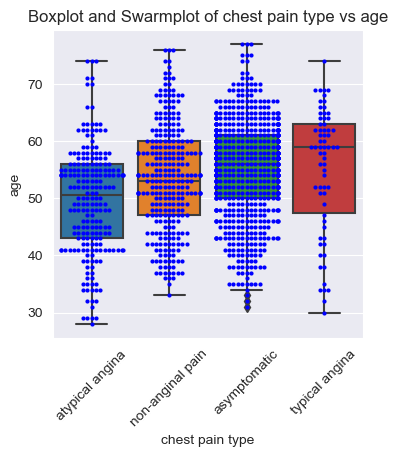

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 32.4% of the points cannot be placed; you may want to decrease

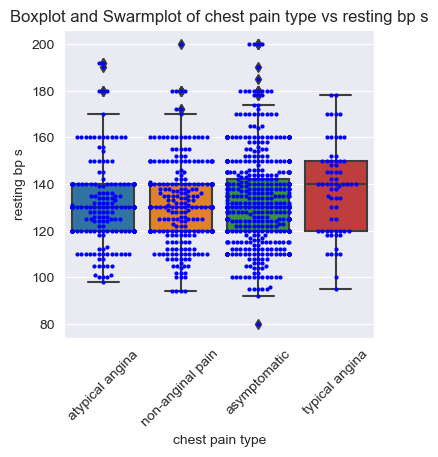

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.2% of the points cannot be placed; you may want to decrease

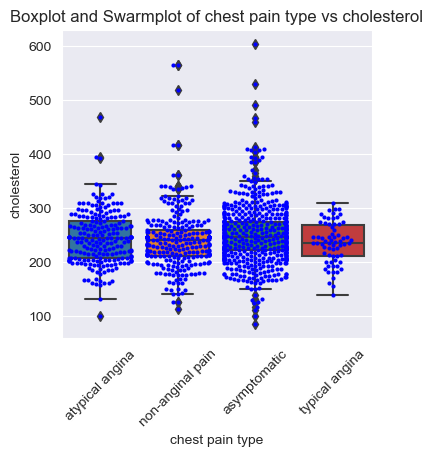

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 23.4% of the points cannot be placed; you may want to decrease

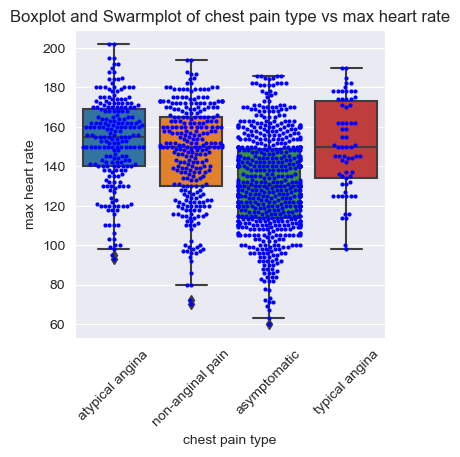

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.6% of the points cannot be placed; you may want to decrease

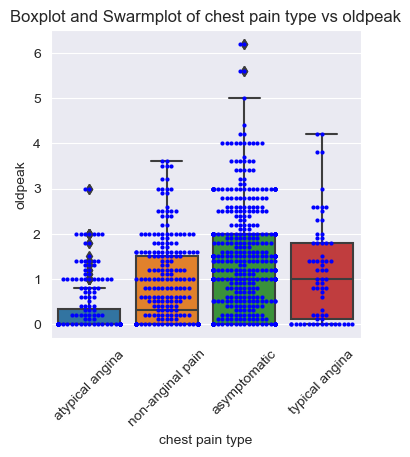

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.9% of the points cannot be placed; you may want to decrease 

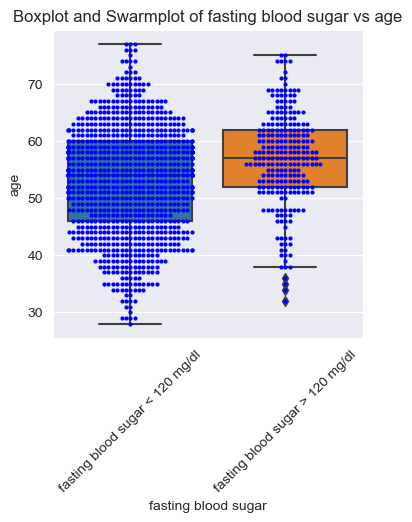

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 41.9% of the points cannot be placed; you may want to decrease

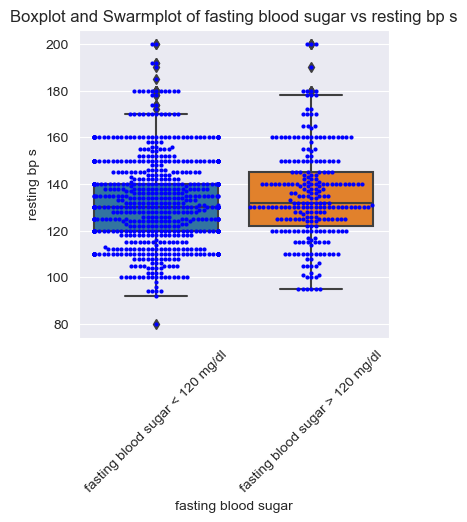

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.6% of the points cannot be placed; you may want to decrease

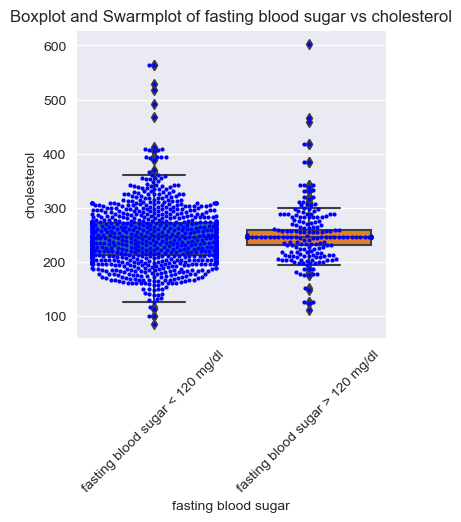

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.9% of the points cannot be placed; you may want to decrease 

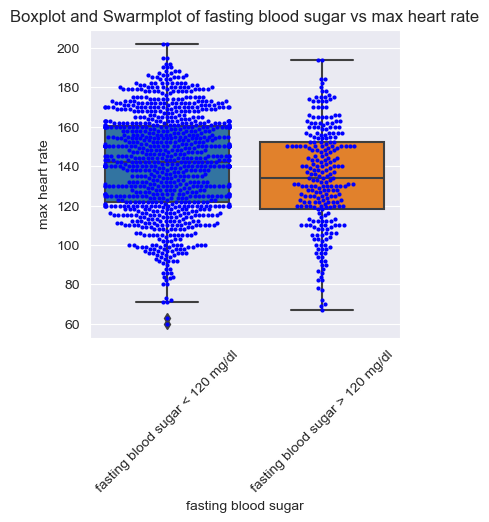

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 48.0% of the points cannot be placed; you may want to decrease

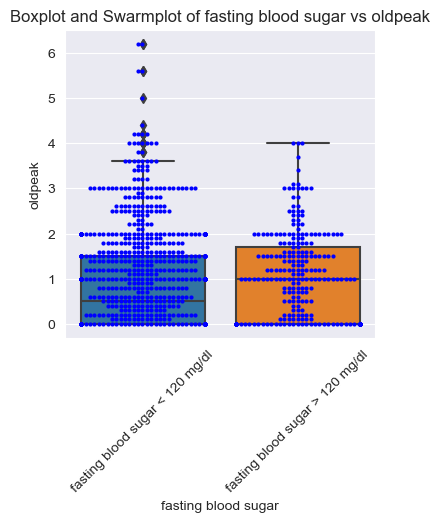

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.2% of the points cannot be placed; you may want to decrease

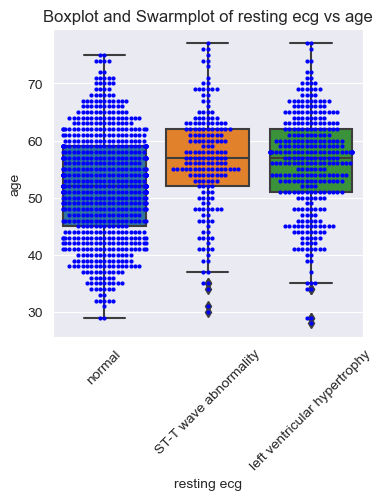

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 46.6% of the points cannot be placed; you may want to decrease

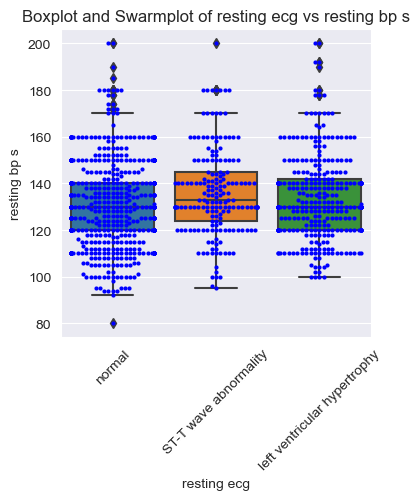

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 41.1% of the points cannot be placed; you may want to decrease

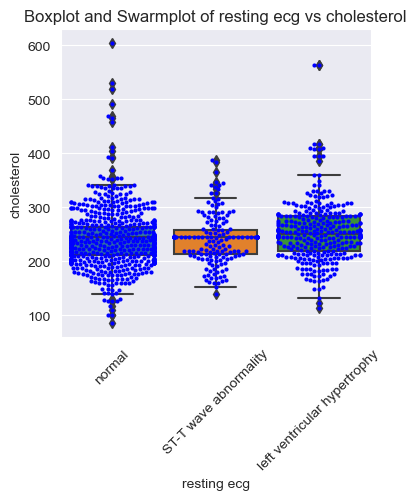

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.9% of the points cannot be placed; you may want to decrease

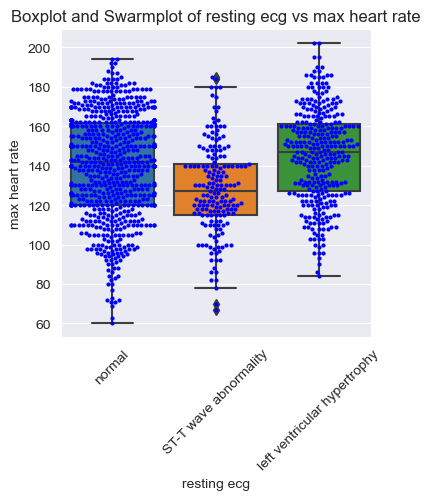

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 55.3% of the points cannot be placed; you may want to decrease

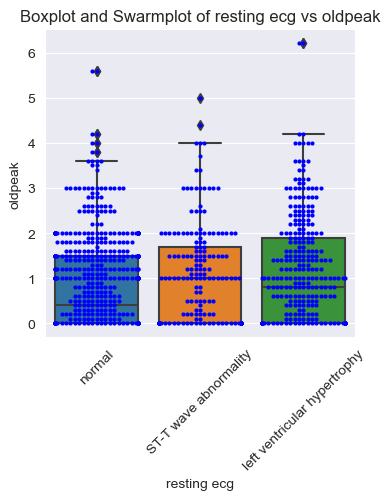

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


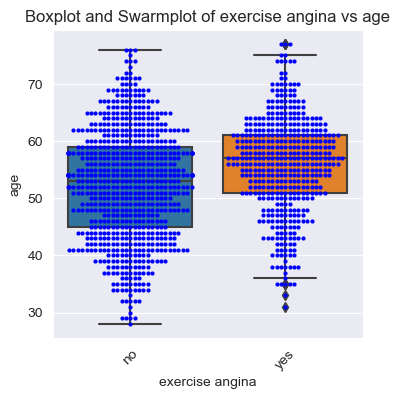

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 35.5% of the points cannot be placed; you may want to decrease

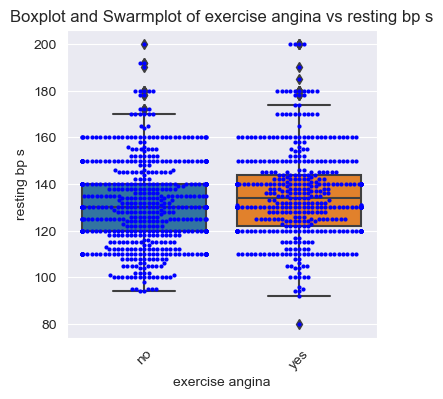

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.0% of the points cannot be placed; you may want to decrease

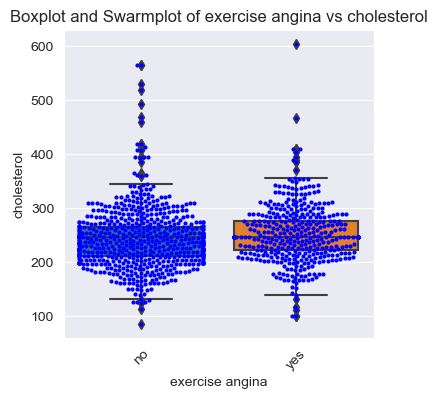

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.1% of the points cannot be placed; you may want to decrease 

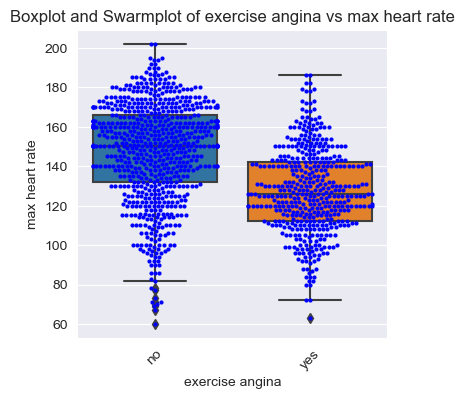

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 48.6% of the points cannot be placed; you may want to decrease

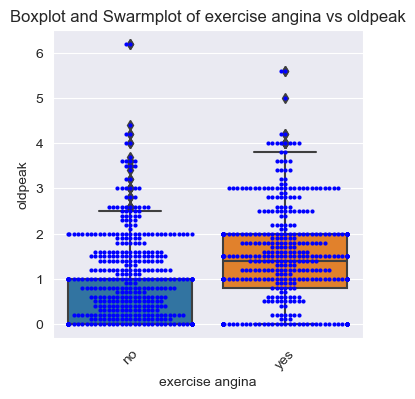

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.6% of the points cannot be placed; you may want to decrease 

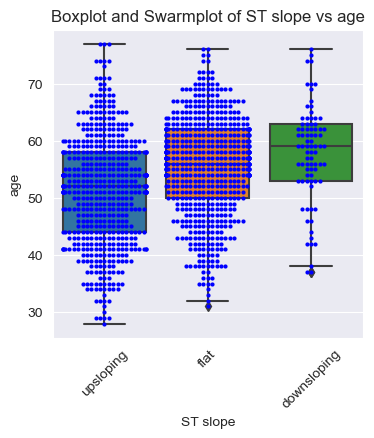

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 39.0% of the points cannot be placed; you may want to decrease

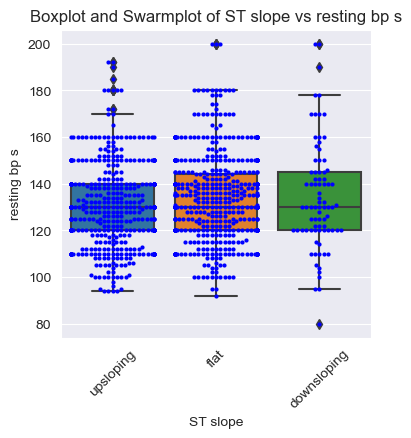

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 29.5% of the points cannot be placed; you may want to decrease

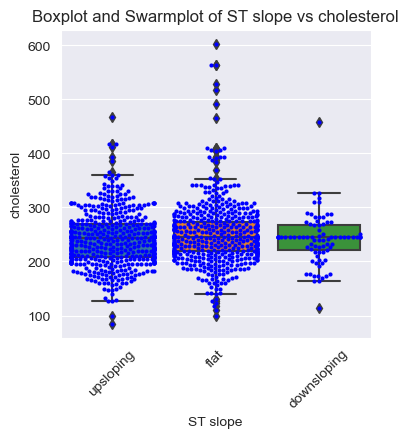

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.5% of the points cannot be placed; you may want to decrease

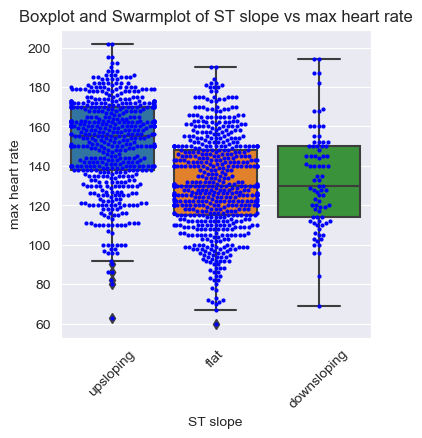

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 60.5% of the points cannot be placed; you may want to decrease

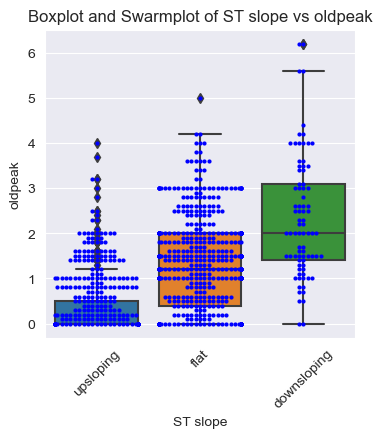

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


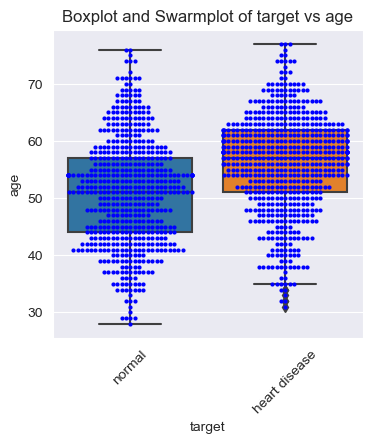

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 32.3% of the points cannot be placed; you may want to decrease

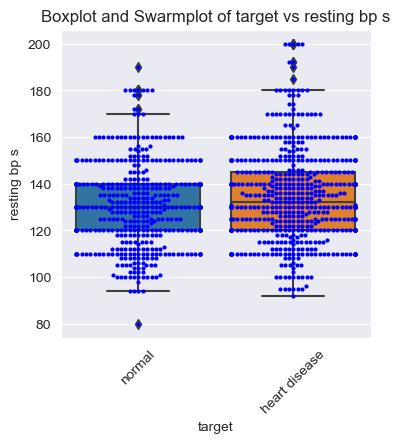

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.4% of the points cannot be placed; you may want to decrease

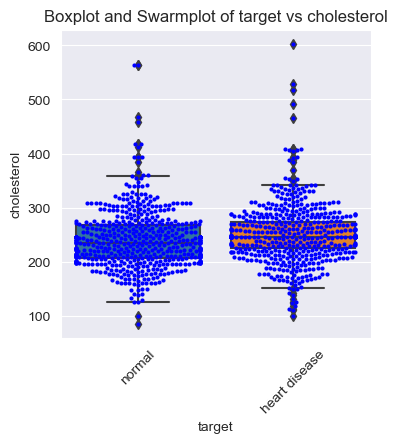

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


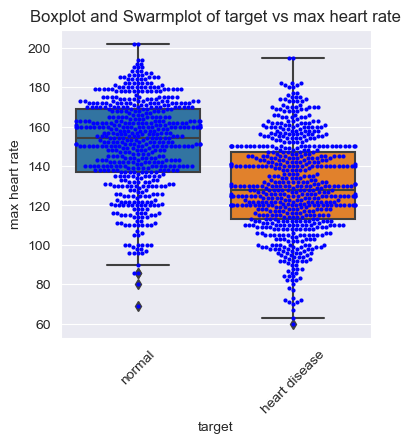

C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Othmane\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 49.9% of the points cannot be placed; you may want to decrease

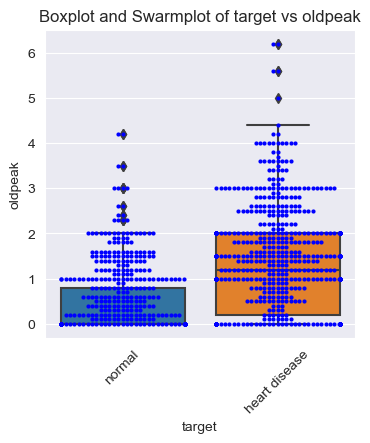

In [31]:
for i in categorical_variables:
    for j in numerical_variables:
        plt.figure(figsize=(4, 4))
        sns.boxplot(x=i, y=j, data=data)
        sns.swarmplot(x=i, y=j, data=data, color='blue', size=3)
        plt.title('Boxplot and Swarmplot of '+i+' vs '+ j)
        plt.xlabel(i)
        plt.ylabel(j)
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
        plt.show()